# Simple notebook to do a comparitive time series between one or more countries

In [217]:
import requests
import io 
import pandas as pd

# Load Corona Virus Data

In [218]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))



# Load Population Data

# Create Generic Functions

In [219]:
# Function for getting data for country 
def getDataForCountry(countryName,dataFr):
    df_country = dataFr.loc[df['Country/Region'] == countryName]
    df_country = df_country.transpose()
    df_country=df_country.drop(df_country.index[[0,1,2,3]])
    df_country[countryName] =  df_country.iloc[: , 0]

    # Iterate over the sequence of column names to append
    for index in range(df_country.shape[1]-1):
       if index>0:
           df_country[countryName] =  df_country[countryName] +  df_country.iloc[: , index]
    # Remove the extra columns 
    for index in range(df_country.shape[1]-1):
        df_country.drop(df_country.columns[0], axis = 1, inplace = True) 
    return df_country;





In [220]:
# Function for getting data for Province
def getDataForProvince(provinceName,dataFr):
    df_pr = dataFr.loc[df['Province/State'] == provinceName]
    df_pr = df_pr.transpose()
    df_pr=df_pr.drop(df_pr.index[[0,1,2,3]])
    df_pr.columns=[provinceName]
    return df_pr;

In [221]:
def drawChartForVirus(countriesList,provinceList,log=False):
    ax = getDataForCountry(countriesList[0],df).plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20,logy=log,lw=4)
    # Using for loop and ignoring the first country
    count=0
    for countryName in countriesList:
        if count >0:
            getDataForCountry(countryName,df).plot(ax=ax,lw=4)
        count=count+1
    
    for provinceName in provinceList: 
        getDataForProvince(provinceName,df).plot(ax=ax,lw=4)

    ax.legend(loc=2, prop={'size': 25})
    if log:
        ax.set_title("Log -  No of Confirmed Cases", size=30)
    else:
        ax.set_title(" No of Confirmed Cases", size=30)

    return;

In [222]:
def drawLogChartForVirus(countriesList):
    return;

In [223]:
def drawhartForVirusandPopulation(countriesList):
    return;

In [224]:
def drawLogChartForVirusandPopulation(countriesList):
    return;

# Fetch data for Countries 

In [225]:
#df_india = df.loc[df['Country/Region'] == "India"]
#df_india = df_india.transpose()
#df_india=df_india.drop(df_india.index[[0,1,2,3]])
# iterating the columns 
#df_india.columns=['India']
#df_india.head()
df_india=getDataForCountry("India",df)
df_hk=getDataForProvince("Hong Kong",df)
df_hubei =getDataForProvince("Hubei",df) 
df_sgp =getDataForCountry("Singapore",df) 
df_france = getDataForCountry("France",df)
df_usa = getDataForCountry("US",df)
df_aus = getDataForCountry("Australia",df)
df_china = getDataForCountry("China",df)
df_spain = getDataForCountry("Spain",df)
df_korea = getDataForCountry("Korea, South",df)
df_germany = getDataForCountry("Germany",df)
df_italy = getDataForCountry("Italy",df)

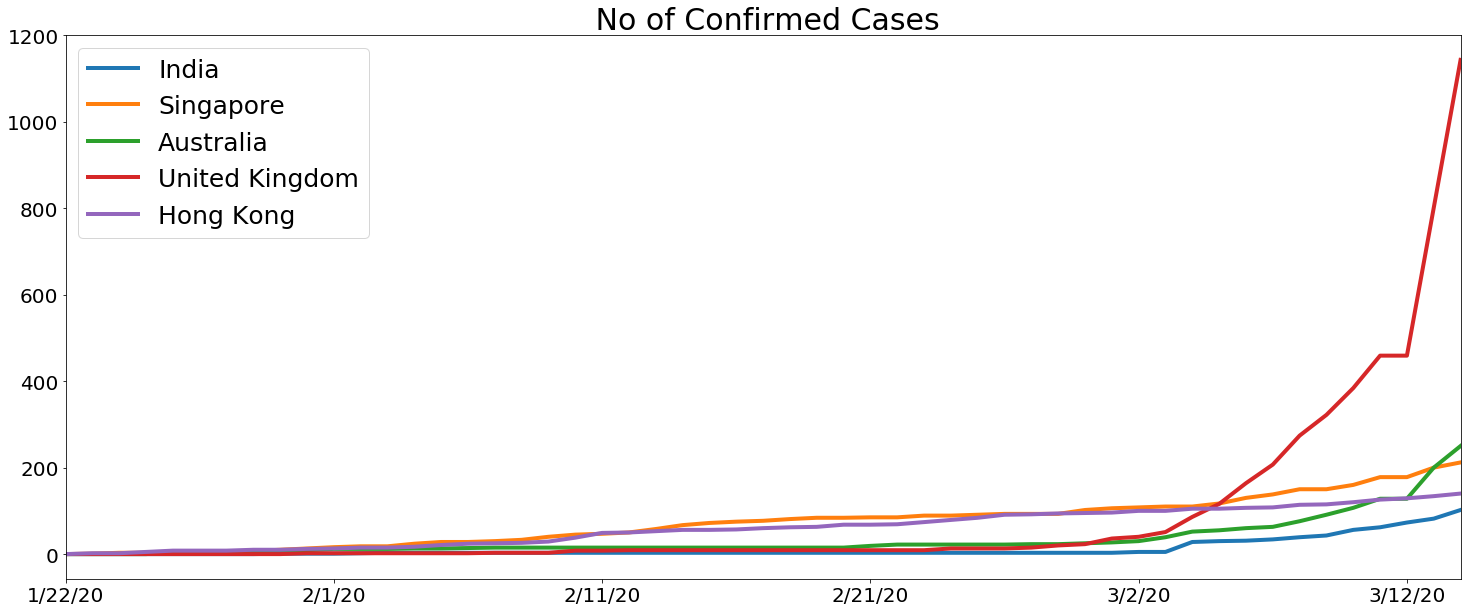

In [226]:
drawChartForVirus(["India","Singapore","Australia"],["Hong Kong"] )

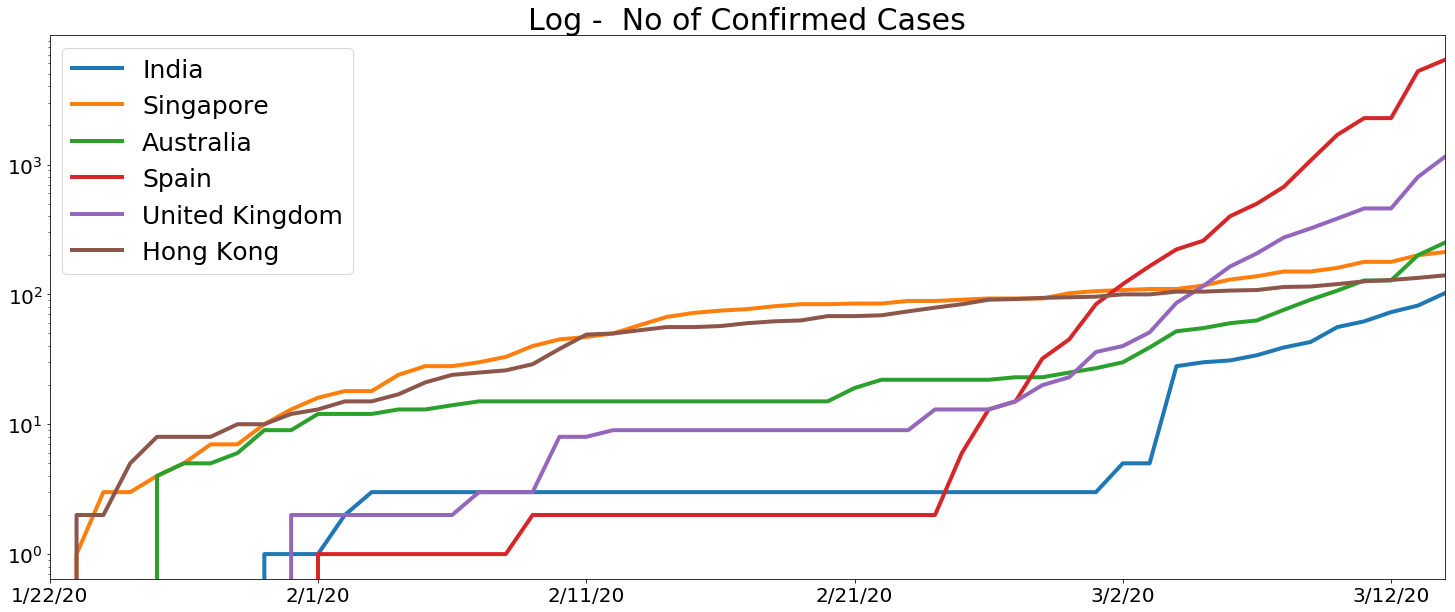

In [227]:
drawChartForVirus(["India","Singapore","Australia"],["Hong Kong"],True )

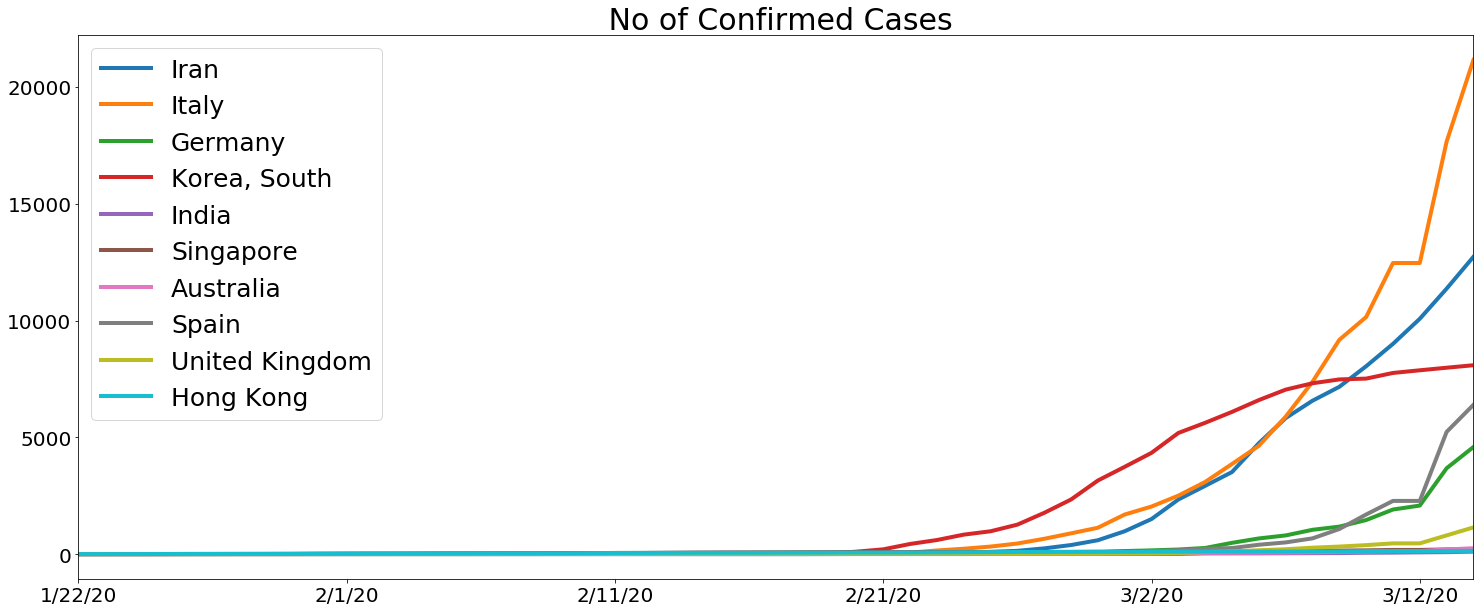

In [228]:
drawChartForVirus(["Iran","Italy","Germany","Korea, South","India","Singapore","Australia","Spain","United Kingdom"],["Hong Kong"],False )



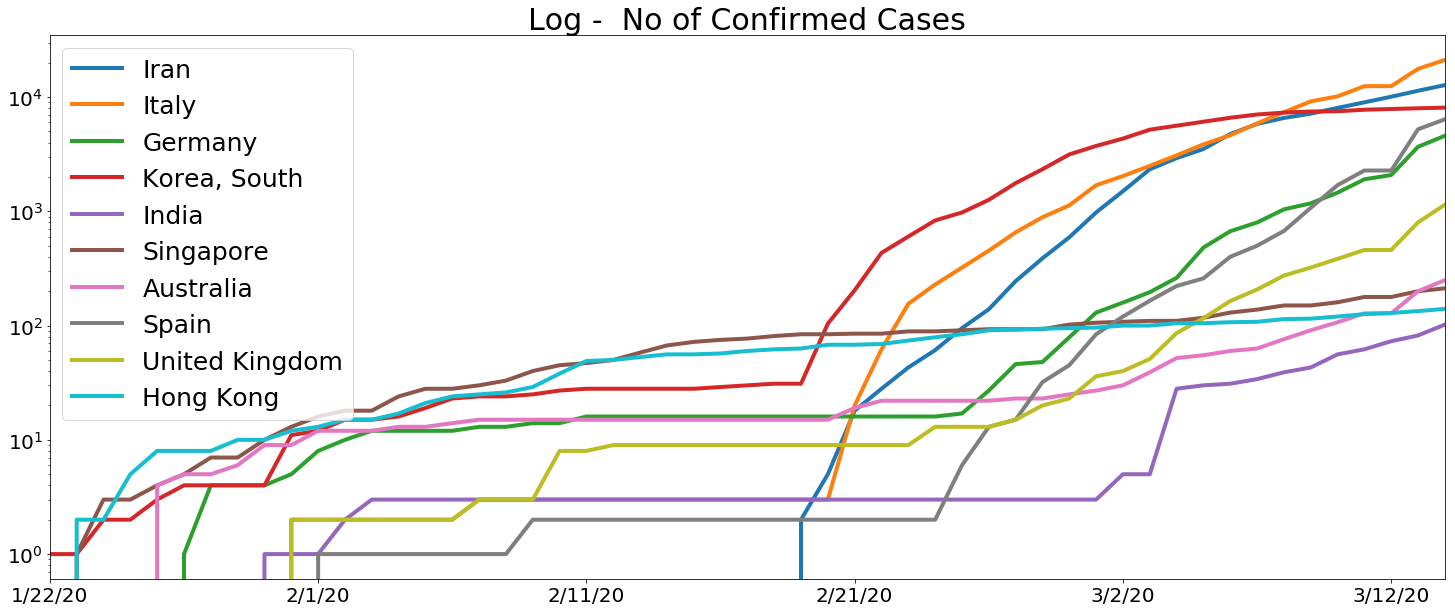

In [229]:
drawChartForVirus(["Iran","Italy","Germany","Korea, South","India","Singapore","Australia","Spain","United Kingdom"],["Hong Kong"],True )




In [230]:
#df_merge_data = pd.merge(df_india, df_hk, left_index=True,right_index=True)
#df_merge_data.head()
#df_merge_data.plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20)

In [231]:
#df_final_data = pd.merge(df_merge_data, df_italy, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_hubei, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_iran, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_france, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_usa, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_china, left_index=True,right_index=True)
#df_final_data = pd.merge(df_final_data, df_germany, left_index=True,right_index=True)


#ax = df_india.plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20)
#df_hk.plot(ax=ax)
#df_china.plot(ax=ax)
#df_aus.plot(ax=ax)
#df_sgp.plot(ax=ax)
#ax.legend(loc=2, prop={'size': 25})
#ax.set_title(" No of Confirmed Cases", size=30)




#
#df_final_data.head()
#df_final_data.plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20)

In [232]:
#ax = df_india.plot(figsize=(25,10),title="Logarithmic No of Confirmed Cases ",fontsize=20,logy=True)
#df_hk.plot(ax=ax)
#df_sgp.plot(ax=ax)
#ax.legend(loc=2, prop={'size': 25})
#ax.set_title("Logarithmic No of Confirmed Cases", size=30)





In [233]:
#ax2 = df_usa.plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20)
#df_iran.plot(ax=ax2)
#df_italy.plot(ax=ax2)
#df_germany.plot(ax=ax2)
#df_korea.plot(ax=ax2)
#df_india.plot(ax=ax2)


#ax2.legend(loc=2, prop={'size': 25})
#ax2.set_title(" No of Confirmed Cases", size=30)





In [234]:
#ax2 = df_usa.plot(figsize=(25,10),fontsize=20,logy=True,)
#df_iran.plot(ax=ax2)
#df_italy.plot(ax=ax2)
#df_germany.plot(ax=ax2)
#df_korea.plot(ax=ax2)
#df_india.plot(ax=ax2)
#df_hk.plot(ax=ax2)
#df_sgp.plot(ax=ax2)
#df_aus.plot(ax=ax2)



#ax2.legend(loc=2, prop={'size': 25})
#ax2.set_title("Logarithmic No of Confirmed Cases", size=30)


